In [1]:
# KNN Classification
from pandas import read_csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import KFold,GridSearchCV,train_test_split , cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, mean_squared_error, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\Shivani Bhavsar\\OneDrive\\Documents\\ExcelR Assignment files\\DS\\A13 KNN\\glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# **Dataset - Glass**
---
---

## Problem statement:

* Prepare a model for glass classification using KNN

## Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

## Type: Type of glass: (class attribute)

 1 -- building_windows_float_processed
 
 2 --building_windows_non_float_processed
 
 3 --vehicle_windows_float_processed
 
 4 --vehicle_windows_non_float_processed (none in this database)
 
 5 --containers
 
 6 --tableware 
 
 7 --headlamps


## EDA:

In [3]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
df.agg(["skew","kurt"])

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
skew,1.625431,0.454181,-1.152559,0.907290,-0.730447,6.551648,2.047054,3.416425,1.754327,1.114915
kurt,4.931737,3.052232,-0.410319,2.060569,2.967903,54.689699,6.681978,12.541084,2.662016,-0.279518


In [8]:
for i in df.columns :
    print(i , '\n', df[i].value_counts())

RI 
 1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64
Na 
 13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64
Mg 
 0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64
Al 
 1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al, Length: 118, dtype: int64
Si 
 72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64
K 
 0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: K, Length: 65, dtype: int64
Ca 
 8.03    5
8.43  

In [9]:
for i in df.columns:
    print(i , "\n" , df[i].unique())

RI 
 [1.52101 1.51761 1.51618 1.51766 1.51742 1.51596 1.51743 1.51756 1.51918
 1.51755 1.51571 1.51763 1.51589 1.51748 1.51784 1.52196 1.51911 1.51735
 1.5175  1.51966 1.51736 1.51751 1.5172  1.51764 1.51793 1.51721 1.51768
 1.51747 1.51775 1.51753 1.51783 1.51567 1.51909 1.51797 1.52213 1.51779
 1.5221  1.51786 1.519   1.51869 1.52667 1.52223 1.51898 1.5232  1.51926
 1.51808 1.51837 1.51778 1.51769 1.51215 1.51824 1.51754 1.51905 1.51977
 1.52172 1.52227 1.52099 1.52152 1.523   1.51574 1.51848 1.51593 1.51631
 1.5159  1.51645 1.51627 1.51613 1.51592 1.51646 1.51594 1.51409 1.51625
 1.51569 1.5164  1.51841 1.51605 1.51588 1.51629 1.5186  1.51689 1.51811
 1.51655 1.5173  1.5182  1.52725 1.5241  1.52475 1.53125 1.53393 1.52222
 1.51818 1.52664 1.52739 1.52777 1.51892 1.51847 1.51846 1.51829 1.51708
 1.51673 1.51652 1.51844 1.51663 1.51687 1.51707 1.52177 1.51872 1.51667
 1.52081 1.52068 1.5202  1.52614 1.51813 1.518   1.51789 1.51806 1.51711
 1.51674 1.5169  1.51851 1.51662 1.51709 1.516

In [10]:
df[df.Type==1] 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...
65,1.52099,13.69,3.59,1.12,71.96,0.09,9.40,0.0,0.00,1
66,1.52152,13.05,3.65,0.87,72.22,0.19,9.85,0.0,0.17,1
67,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
68,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1


In [11]:
df[df.Type==2] 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
70,1.51574,14.86,3.67,1.74,71.87,0.16,7.36,0.00,0.12,2
71,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.00,0.32,2
72,1.51593,13.09,3.59,1.52,73.10,0.67,7.83,0.00,0.00,2
73,1.51631,13.34,3.57,1.57,72.87,0.61,7.89,0.00,0.00,2
74,1.51596,13.02,3.56,1.54,73.11,0.72,7.90,0.00,0.00,2
...,...,...,...,...,...,...,...,...,...,...
141,1.51851,13.20,3.63,1.07,72.83,0.57,8.41,0.09,0.17,2
142,1.51662,12.85,3.51,1.44,73.01,0.68,8.23,0.06,0.25,2
143,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2
144,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2


In [12]:
df[df.Type==3] 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
146,1.51769,13.65,3.66,1.11,72.77,0.11,8.60,0.00,0.00,3
147,1.51610,13.33,3.53,1.34,72.67,0.56,8.33,0.00,0.00,3
148,1.51670,13.24,3.57,1.38,72.70,0.56,8.44,0.00,0.10,3
149,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.00,0.00,3
150,1.51665,13.14,3.45,1.76,72.48,0.60,8.38,0.00,0.17,3
151,1.52127,14.32,3.90,0.83,71.50,0.00,9.49,0.00,0.00,3
152,1.51779,13.64,3.65,0.65,73.00,0.06,8.93,0.00,0.00,3
153,1.51610,13.42,3.40,1.22,72.69,0.59,8.32,0.00,0.00,3
154,1.51694,12.86,3.58,1.31,72.61,0.61,8.79,0.00,0.00,3
155,1.51646,13.04,3.40,1.26,73.01,0.52,8.58,0.00,0.00,3


In [13]:
df[df.Type==5] 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
163,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5
164,1.51915,12.73,1.85,1.86,72.69,0.60,10.09,0.00,0.00,5
165,1.52171,11.56,1.88,1.56,72.86,0.47,11.41,0.00,0.00,5
166,1.52151,11.03,1.71,1.56,73.44,0.58,11.62,0.00,0.00,5
167,1.51969,12.64,0.00,1.65,73.75,0.38,11.53,0.00,0.00,5
168,1.51666,12.86,0.00,1.83,73.88,0.97,10.17,0.00,0.00,5
169,1.51994,13.27,0.00,1.76,73.03,0.47,11.32,0.00,0.00,5
170,1.52369,13.44,0.00,1.58,72.22,0.32,12.24,0.00,0.00,5
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5


In [14]:
df[df.Type==6] 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
176,1.51905,14.00,2.39,1.56,72.37,0.0,9.57,0.0,0.0,6
177,1.51937,13.79,2.41,1.19,72.76,0.0,9.77,0.0,0.0,6
178,1.51829,14.46,2.24,1.62,72.38,0.0,9.26,0.0,0.0,6
179,1.51852,14.09,2.19,1.66,72.67,0.0,9.32,0.0,0.0,6
180,1.51299,14.40,1.74,1.54,74.55,0.0,7.59,0.0,0.0,6
181,1.51888,14.99,0.78,1.74,72.50,0.0,9.95,0.0,0.0,6
182,1.51916,14.15,0.00,2.09,72.74,0.0,10.88,0.0,0.0,6
183,1.51969,14.56,0.00,0.56,73.48,0.0,11.22,0.0,0.0,6
184,1.51115,17.38,0.00,0.34,75.41,0.0,6.65,0.0,0.0,6


In [15]:
df[df.Type==7] 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
185,1.51131,13.69,3.20,1.81,72.81,1.76,5.43,1.19,0.00,7
186,1.51838,14.32,3.26,2.22,71.25,1.46,5.79,1.63,0.00,7
187,1.52315,13.44,3.34,1.23,72.38,0.60,8.83,0.00,0.00,7
188,1.52247,14.86,2.20,2.06,70.26,0.76,9.76,0.00,0.00,7
189,1.52365,15.79,1.83,1.31,70.43,0.31,8.61,1.68,0.00,7
190,1.51613,13.88,1.78,1.79,73.10,0.00,8.67,0.76,0.00,7
191,1.51602,14.85,0.00,2.38,73.28,0.00,8.76,0.64,0.09,7
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7
193,1.51719,14.75,0.00,2.00,73.02,0.00,8.53,1.59,0.08,7
194,1.51683,14.56,0.00,1.98,73.29,0.00,8.52,1.57,0.07,7


In [16]:
df.shape

(214, 10)

In [17]:
df1 = df[:70]
df2 = df[70:146]
df3 = df[146:163]
df5 = df[163:176]
df6 = df[176:185]
df7 = df[185:214]

<AxesSubplot:>

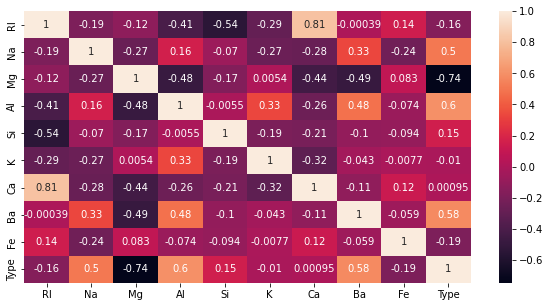

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)

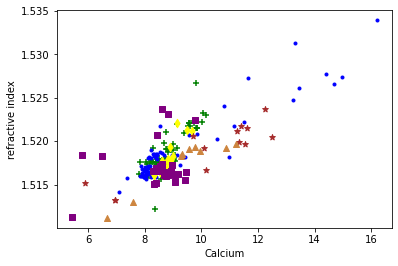

In [19]:
# Ca(Calcium)vs RI(refractive index)
plt.xlabel('Calcium')
plt.ylabel('refractive index')
plt.scatter(df1['Ca'], df1['RI'],color="green",marker='+')
plt.scatter(df2['Ca'], df2['RI'],color="blue",marker='.')
plt.scatter(df3['Ca'], df3['RI'],color="yellow",marker='d')
plt.scatter(df5['Ca'], df5['RI'],color="brown",marker='*')
plt.scatter(df6['Ca'], df6['RI'],color="peru",marker='^')
plt.scatter(df7['Ca'], df7['RI'],color="purple",marker='s')

<AxesSubplot:xlabel='Type', ylabel='Mg'>

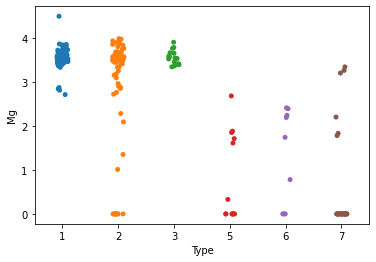

In [20]:
# Type vs Mg(Magnesium)
plt.xlabel('Type')
plt.ylabel('Magnesium')
sns.stripplot(x='Type',y='Mg',data=df)

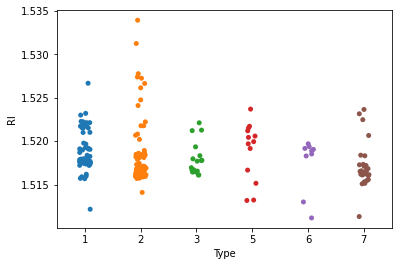

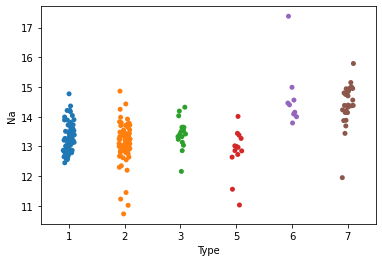

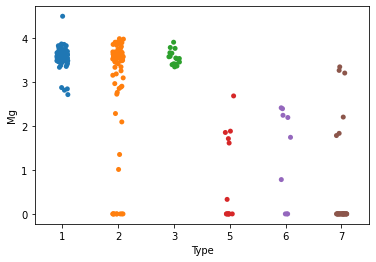

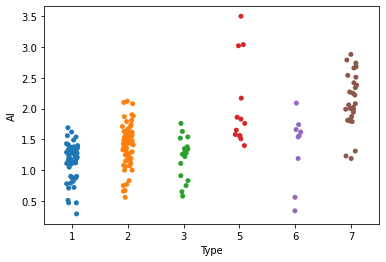

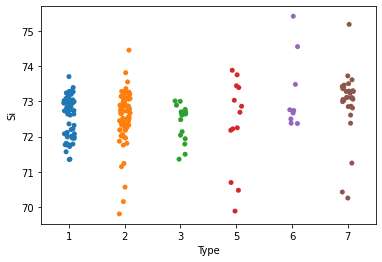

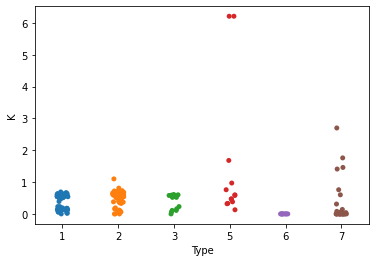

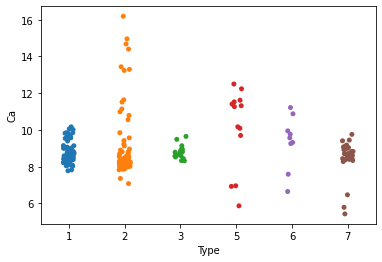

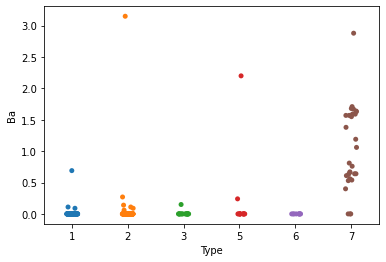

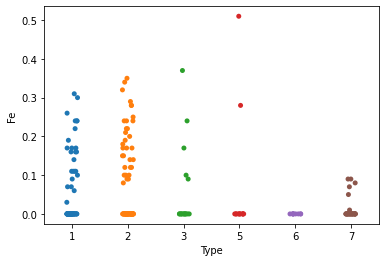

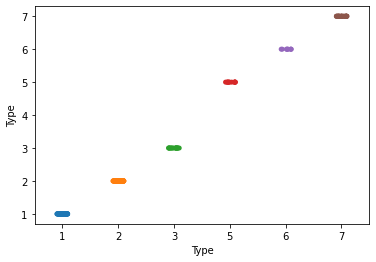

In [21]:
for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.stripplot(x='Type',y=i,data=df)

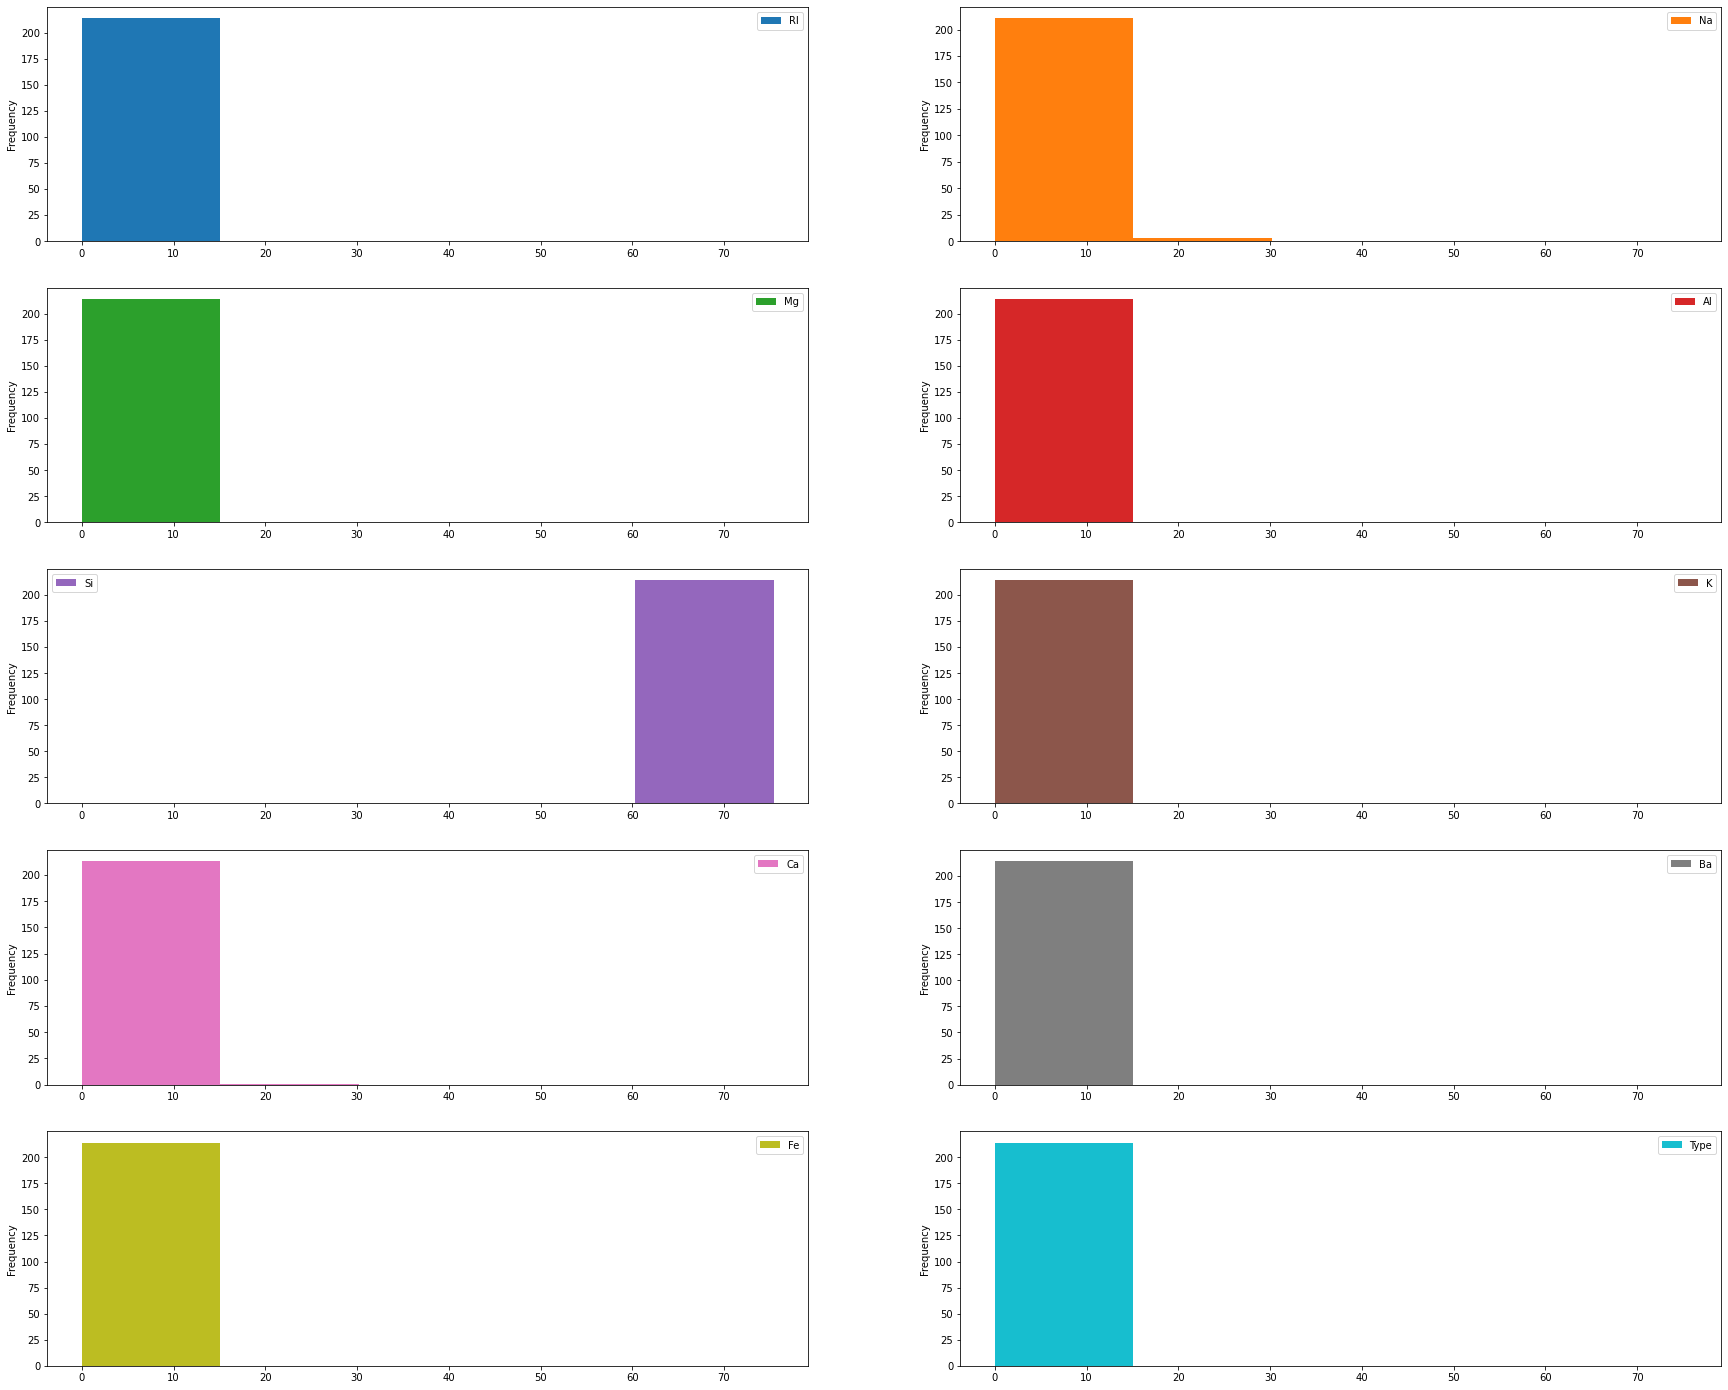

In [22]:
plt.rcParams['figure.figsize']=(30,25)

df.plot(kind='hist', bins=5, subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()

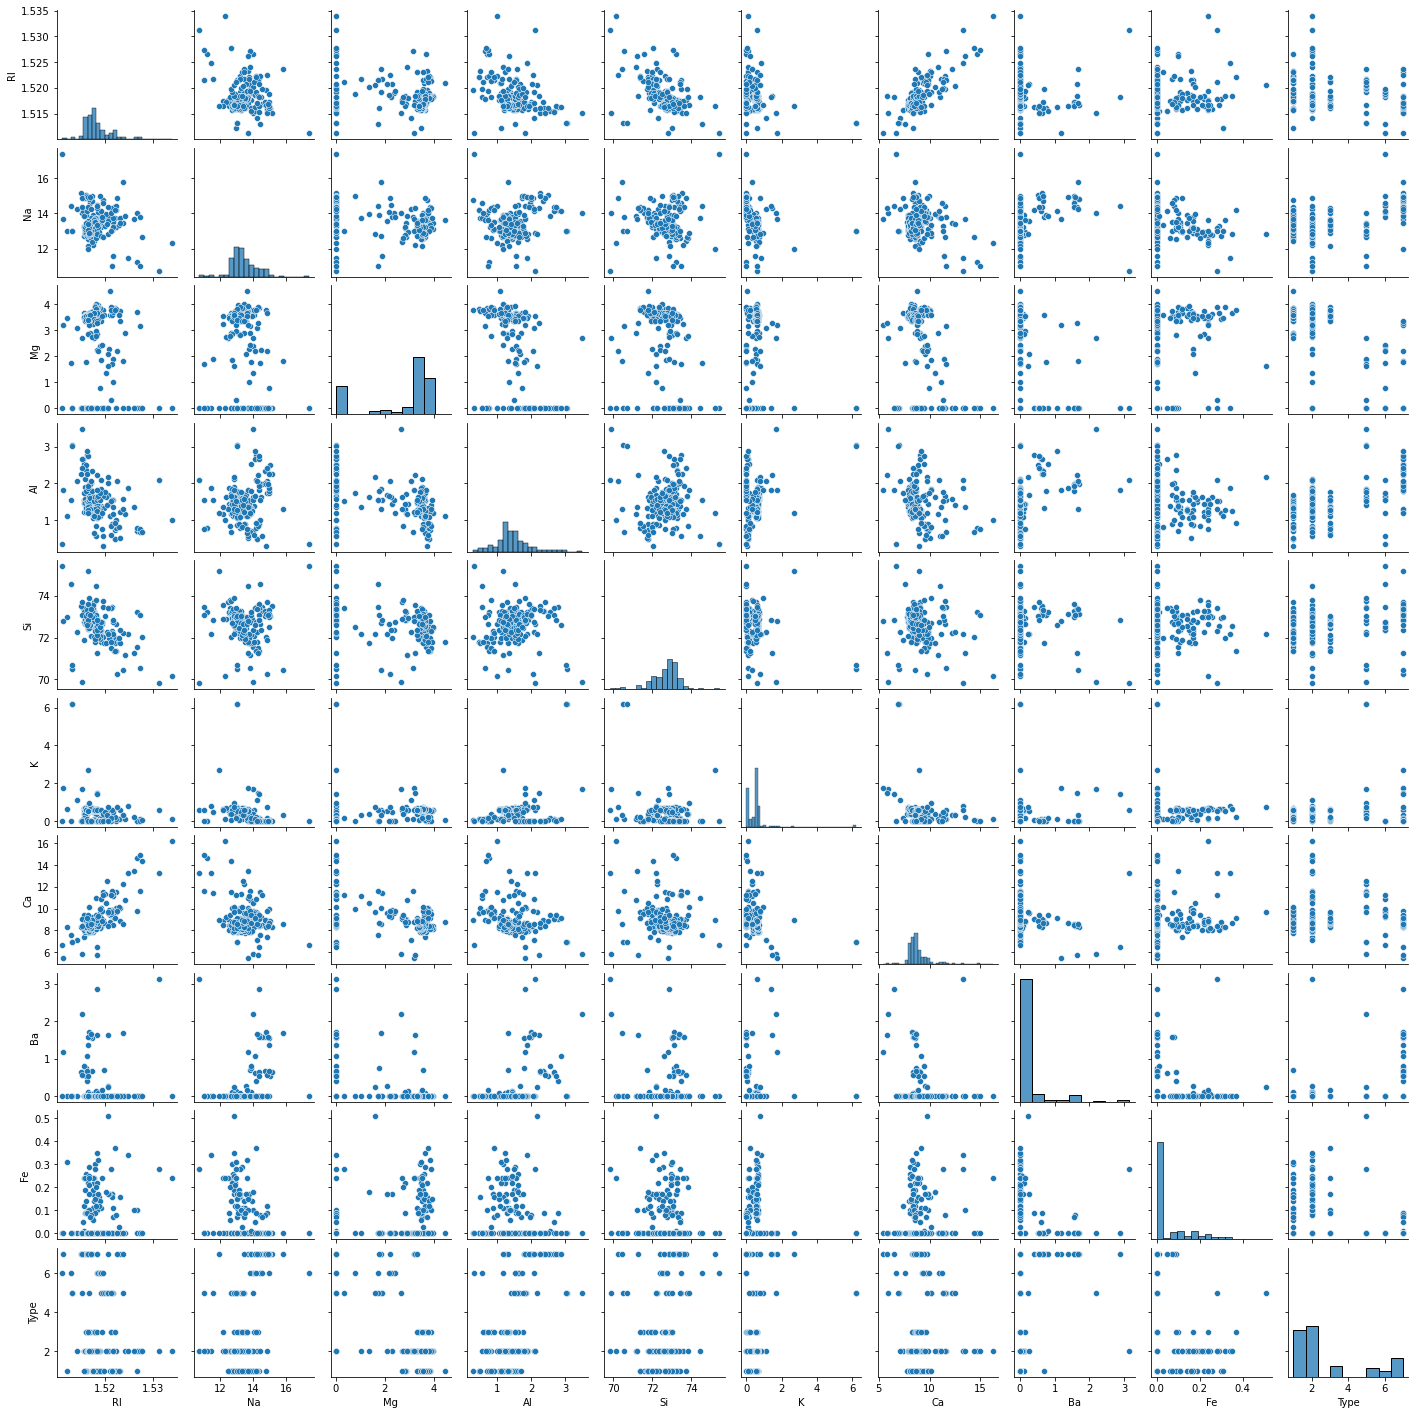

In [23]:
sns.pairplot(data = df, height = 2)

<Figure size 2160x1800 with 0 Axes>

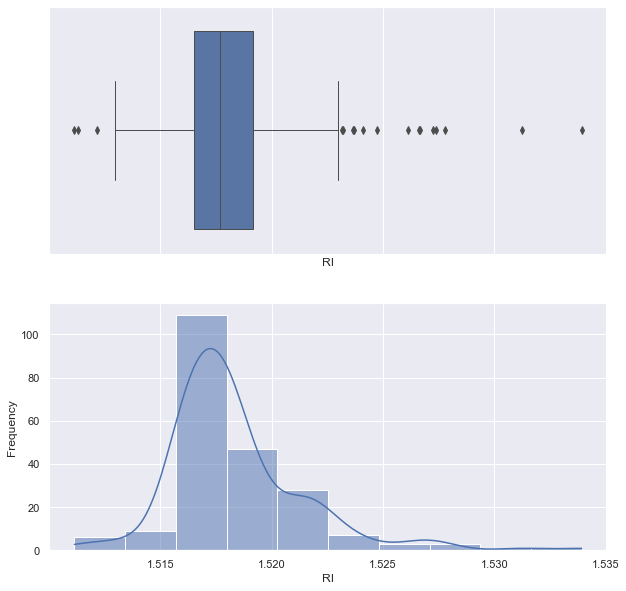

<Figure size 720x720 with 0 Axes>

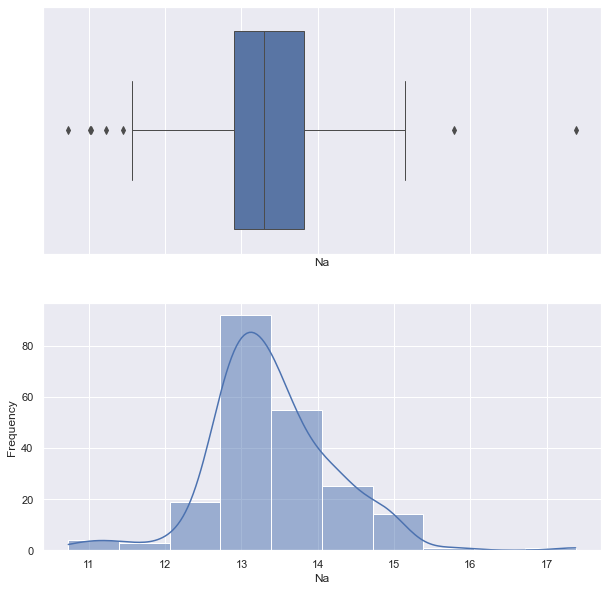

<Figure size 720x720 with 0 Axes>

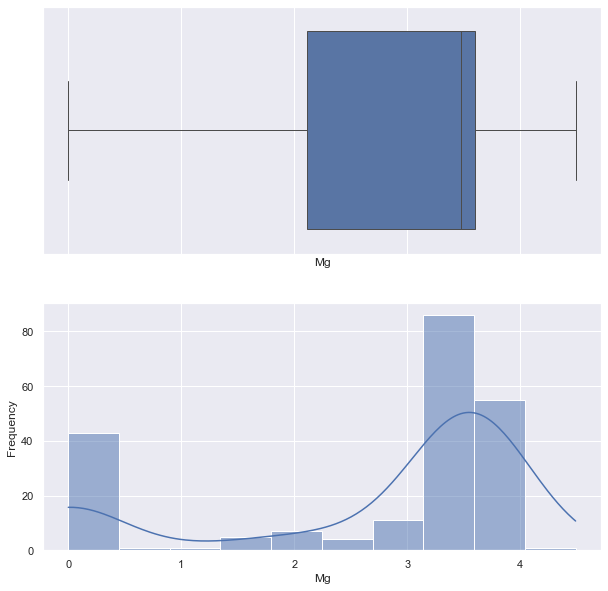

<Figure size 720x720 with 0 Axes>

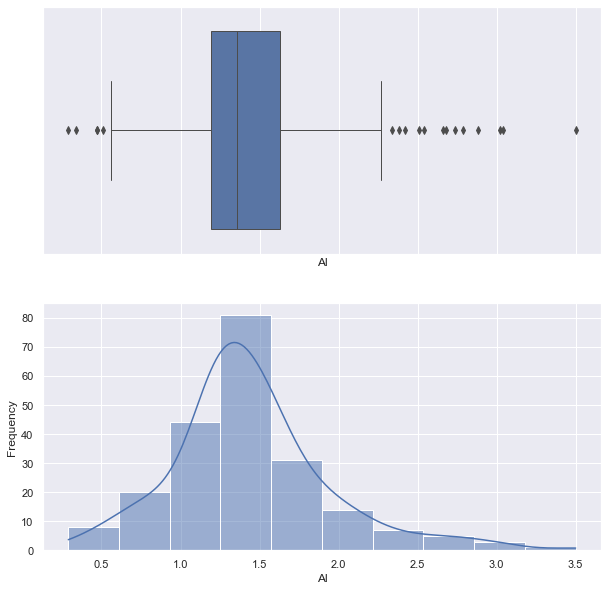

<Figure size 720x720 with 0 Axes>

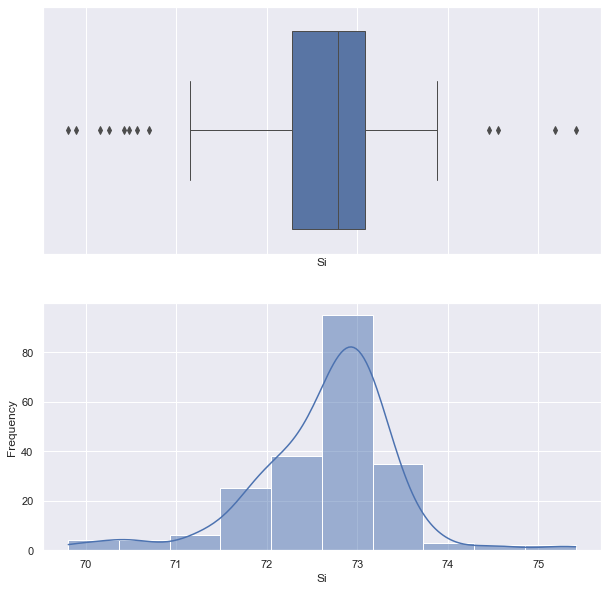

<Figure size 720x720 with 0 Axes>

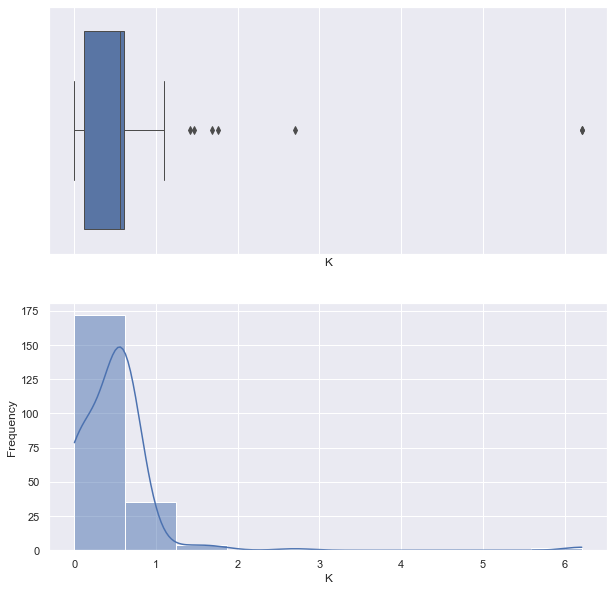

<Figure size 720x720 with 0 Axes>

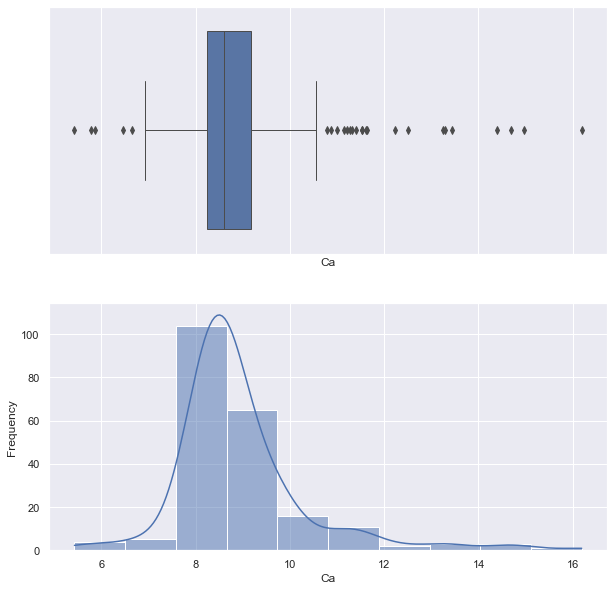

<Figure size 720x720 with 0 Axes>

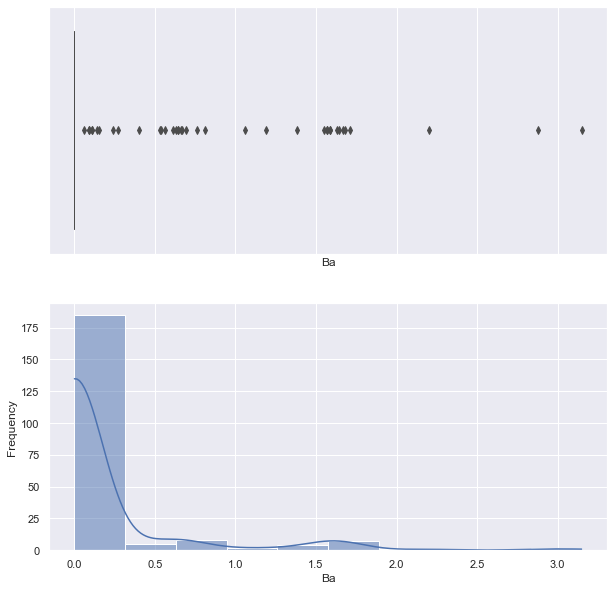

<Figure size 720x720 with 0 Axes>

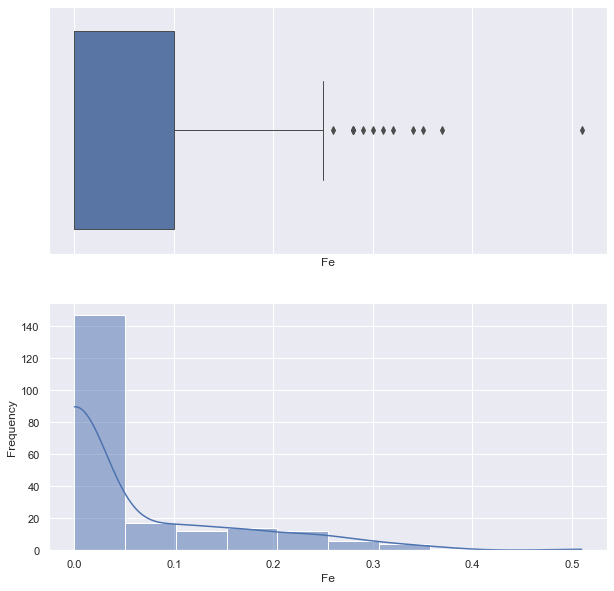

<Figure size 720x720 with 0 Axes>

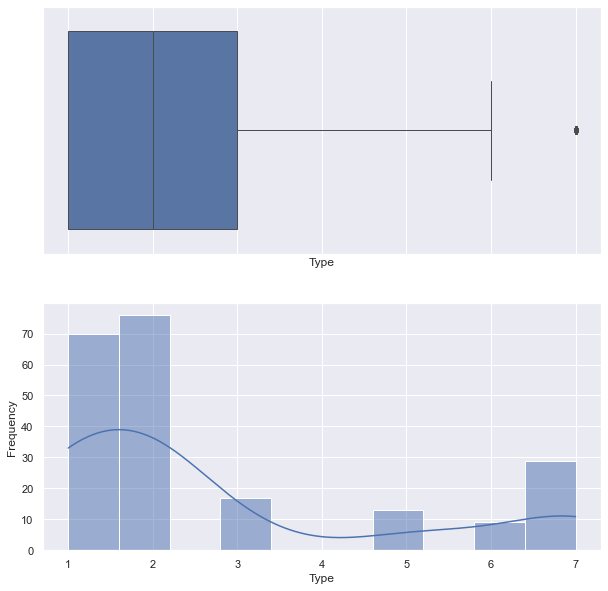

In [24]:
for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(10, 10)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

## KNN

> The KNN algorithm is a supervised machine learning model . It predicts a target variable using one or multiple independent variables.

<AxesSubplot:>

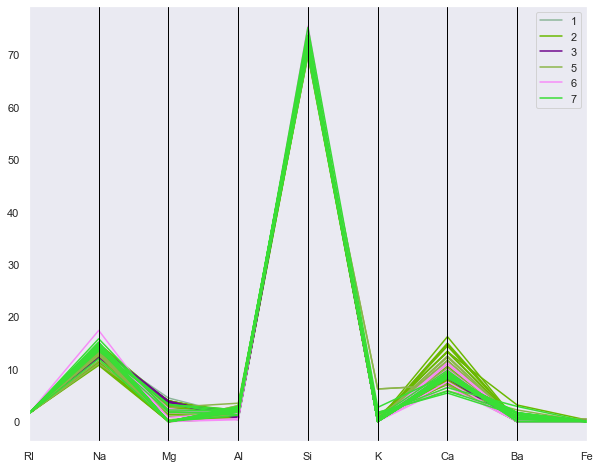

In [25]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(10,8))
parallel_coordinates(df, "Type")

## Feature Scaling:

In [26]:
array = np.array(df)
array

array([[ 1.52101, 13.64   ,  4.49   , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  0.     ,  0.     ,  1.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  1.64   ,  0.     ,  7.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  1.57   ,  0.     ,  7.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  1.67   ,  0.     ,  7.     ]])

In [27]:
array.shape

(214, 10)

In [28]:
from sklearn.preprocessing import StandardScaler

#Normalization Function:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(array)
scaled_data
# scaler = StandardScaler().transform(array)

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.35287683,
        -0.5864509 , -0.84827468],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.35287683,
        -0.5864509 , -0.84827468],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.35287683,
        -0.5864509 , -0.84827468],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ...,  2.95320036,
        -0.5864509 ,  2.01047778],
       [-0.61239854,  1.19327046, -1.86551055, ...,  2.81208731,
        -0.5864509 ,  2.01047778],
       [-0.41436305,  1.00915211, -1.86551055, ...,  3.01367739,
        -0.5864509 ,  2.01047778]])

In [29]:
scaled_data = pd.DataFrame(scaled_data, columns = df.columns)
scaled_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,-0.848275
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,-0.848275
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,-0.848275
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,-0.848275
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,-0.848275
...,...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451,2.010478
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451,2.010478
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451,2.010478
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451,2.010478


## Explainatry variable(x) & Dependent variable(y) of the data:

* Note : In classification  problems KNN work on the basis of mode, and in Regression problems it works with mean.

In [31]:
x  = scaled_data.iloc[: , 0:9]
y = df.iloc[ :,9]
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

Visualiztion using TSNE



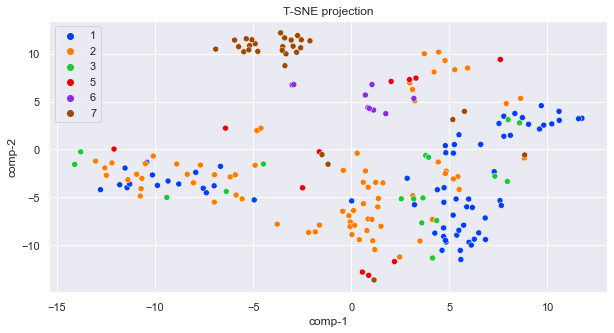

In [34]:
import sklearn
from sklearn.manifold import TSNE

print("Visualiztion using TSNE\n")
tsne = TSNE(n_components=2,random_state=123)
z = tsne.fit_transform(x)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
    
plt.figure(figsize=(10,5))
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
              palette=sns.color_palette("bright", 6),
                data=df).set(title="T-SNE projection") 
plt.show()

## Using Train test splits:

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=0)

In [36]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(149, 9)
(65, 9)
(149,)
(65,)


## Different Method of Distances in K-Nearest Neighbors:
______

* 1. Euclidean
* 2. Manhattan

## Using Euclidean Distance:

In [37]:
from sklearn.model_selection import KFold
from scipy.spatial import distance

In [38]:
k_range = list(range(1, 41))
parameters = {
    'n_neighbors': k_range,
     'weights': ['uniform', 'distance'] ,
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

## Grid Search for Algorithm Tuning

In [39]:
model = KNeighborsClassifier(metric=distance.sqeuclidean)
grid = GridSearchCV(estimator=model, param_grid=parameters,n_jobs=-1,verbose=1, scoring="accuracy")
grid.fit(x_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


GridSearchCV(estimator=KNeighborsClassifier(metric=<function sqeuclidean at 0x0000022861A434C0>),
             n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [40]:
print(grid.best_score_ ,'\n',"\n" , grid.best_params_)

0.6924137931034482 
 
 {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}


In [41]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(grid.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(grid.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.7692


> By fitting the model with GridsearchCv we came up with the overfitting issue, to overcome this issue now we plot the training and testing graph to find out best k-Neighbor value.

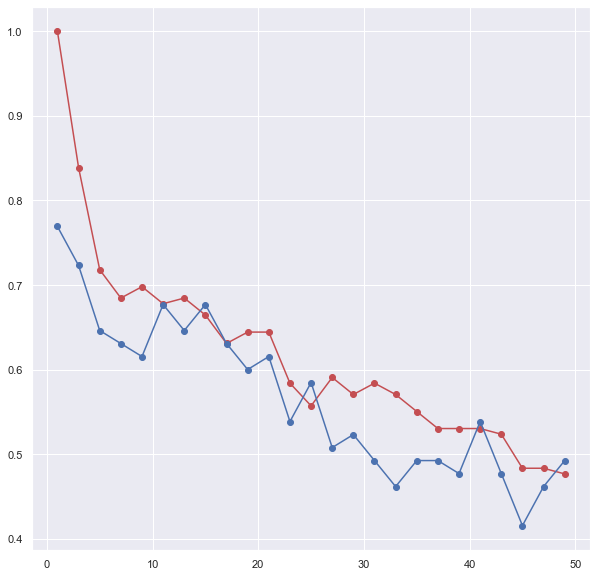

In [42]:
# creating empty list variable 
acc = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values

for i in range(1,50,2):
    neigh = KNeighborsClassifier(n_neighbors=i, metric=distance.sqeuclidean)
    neigh.fit(x_train, y_train)
    train_acc = np.mean(neigh.predict(x_train) == y_train)
    test_acc = np.mean(neigh.predict(x_test) == y_test)
    acc.append([train_acc, test_acc])


# train accuracy plot 
plt.plot(np.arange(1,50,2),[i[0] for i in acc],"ro-")

# test accuracy plot
plt.plot(np.arange(1,50,2),[i[1] for i in acc],"bo-")

> If we set a K-neighbors value = 11 , so there is neither  problem of overfitting nor underfitting on the basis of obove visulaisation.

* Note : check that point where training and testing point are matched or closer to each other with best accuarcy.

## Model Building:

In [43]:
euclid_model = KNeighborsClassifier(n_neighbors=11, metric=distance.sqeuclidean)
euclid_model.fit(x_train,y_train)

KNeighborsClassifier(metric=<function sqeuclidean at 0x0000022861A434C0>,
                     n_neighbors=11)

In [44]:
print(f'euclidean distance \n\n')
for i in range(2,40):
  euclid_model = euclid_model
  cv = KFold(n_splits=i, shuffle=True, random_state=0)
  scores = cross_val_score(euclid_model, x, y, cv=cv)
  print(f'K-Fold number {i} : Accuracy {scores.mean()}')

euclidean distance 


K-Fold number 2 : Accuracy 0.5794392523364486
K-Fold number 3 : Accuracy 0.6261737089201879
K-Fold number 4 : Accuracy 0.6171383647798742
K-Fold number 5 : Accuracy 0.6122923588039867
K-Fold number 6 : Accuracy 0.6308201058201058
K-Fold number 7 : Accuracy 0.6125960061443932
K-Fold number 8 : Accuracy 0.6356837606837606
K-Fold number 9 : Accuracy 0.6213768115942028
K-Fold number 10 : Accuracy 0.6227272727272728
K-Fold number 11 : Accuracy 0.6416267942583732
K-Fold number 12 : Accuracy 0.6318082788671023
K-Fold number 13 : Accuracy 0.6507352941176472
K-Fold number 14 : Accuracy 0.6348214285714285
K-Fold number 15 : Accuracy 0.648888888888889
K-Fold number 16 : Accuracy 0.6414835164835164
K-Fold number 17 : Accuracy 0.6447963800904978
K-Fold number 18 : Accuracy 0.6557239057239058
K-Fold number 19 : Accuracy 0.6343700159489633
K-Fold number 20 : Accuracy 0.6531818181818183
K-Fold number 21 : Accuracy 0.6251082251082252
K-Fold number 22 : Accuracy 0.6454545454545455


#### Here the splits for best K-Fold number with best accuracy score is 18.

In [45]:
results = cross_val_score(euclid_model, x_train, y_train, cv=KFold(n_splits=18))
print(results.mean())

0.6118827160493827


#### Cross validation score =  61%

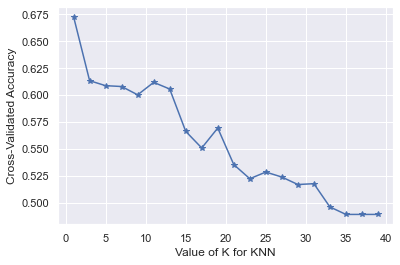

In [46]:
# Visualising k neighbors value:

import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41,2)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric=distance.sqeuclidean)
    scores = cross_val_score(knn, x_train, y_train, cv=KFold(n_splits=18))
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores, marker = '*')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [47]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(euclid_model.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(euclid_model.score(x_test, y_test)))

Training set score: 0.6779
Test set score: 0.6769


In [50]:
# Make predictions
euclid_predictions = euclid_model.predict(x_test)
pd.Series(euclid_predictions).value_counts()

1    33
2    23
7     7
5     1
6     1
dtype: int64

In [51]:
df2 = pd.DataFrame({'actual': y_test, 'euclid': euclid_predictions})
df2.head()

,actual,euclid
197,7,7
37,1,1
89,2,2
176,6,1
170,5,5


In [52]:
# print the scores between dependent test and predicted value

print("Accuracy_score", accuracy_score(y_test,euclid_predictions)*100)

Accuracy_score 67.6923076923077


In [53]:
cm=pd.crosstab(y_test, euclid_predictions, rownames = ['Actual'], colnames= ['Predictions']) 
cm

Predictions,1,2,5,6,7
Actual,,,,,
1,19,2,0,0,0
2,8,17,0,1,0
3,5,2,0,0,0
5,0,1,1,0,0
6,1,1,0,0,0
7,0,0,0,0,7


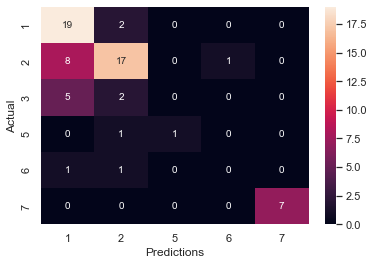

In [54]:
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [55]:
print(classification_report(y_test, euclid_predictions))

              precision    recall  f1-score   support

           1       0.58      0.90      0.70        21
           2       0.74      0.65      0.69        26
           3       0.00      0.00      0.00         7
           5       1.00      0.50      0.67         2
           6       0.00      0.00      0.00         2
           7       1.00      1.00      1.00         7

    accuracy                           0.68        65
   macro avg       0.55      0.51      0.51        65
weighted avg       0.62      0.68      0.63        65



In [56]:
# RMSE for train data
train_preds_grid = grid.predict(x_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = np.sqrt(train_mse)

# RMSE for test data
test_preds_grid = grid.predict(x_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = np.sqrt(test_mse)
print(f'\n train rmse = {train_rmse} \n\n test rmse = {test_rmse} \n\n')


 train rmse = 0.0 

 test rmse = 0.6445033866354896 




In [57]:
y_pred_prob = euclid_model.predict_proba(x_test)
y_pred_prob[10]

# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob , columns=['1', '2','4','5','6','7'])

y_pred_prob_df

,1,2,4,5,6,7
0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
1,0.909091,0.090909,0.000000,0.000000,0.000000,0.0
2,0.363636,0.636364,0.000000,0.000000,0.000000,0.0
3,0.454545,0.090909,0.090909,0.000000,0.363636,0.0
4,0.000000,0.272727,0.000000,0.454545,0.272727,0.0
...,...,...,...,...,...,...
60,0.909091,0.000000,0.090909,0.000000,0.000000,0.0
61,0.454545,0.545455,0.000000,0.000000,0.000000,0.0
62,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
63,0.272727,0.363636,0.090909,0.000000,0.272727,0.0


In [58]:
target= ["1","2","3","5","6","7"]

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)




 ROC AUC score: 0.7142255892255892 




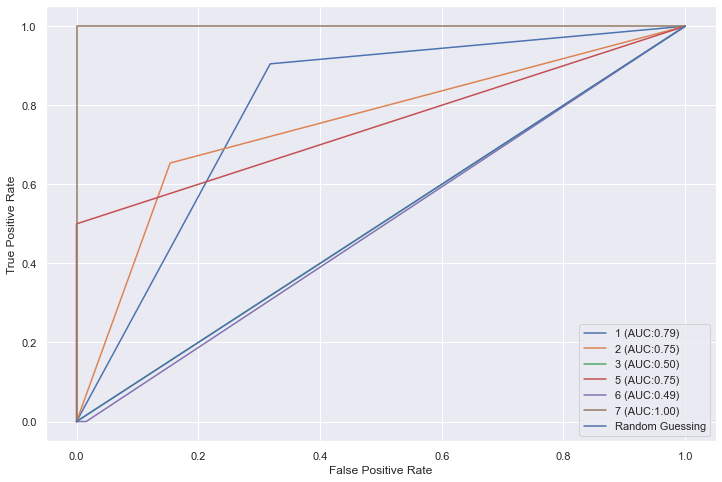

In [59]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))


print(f'\n\n ROC AUC score: {multiclass_roc_auc_score(y_test, euclid_predictions)} \n\n')

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

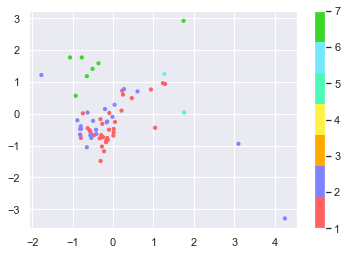

In [60]:
from matplotlib.colors import ListedColormap

# custome color maps
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c=euclid_predictions, s=10, cmap=cm_dark)
f.colorbar(points)
plt.show()

## Using Manhattan Distance :

## Grid Search for Algorithm Tuning

In [61]:
model = KNeighborsClassifier(metric=distance.cityblock)
grid = GridSearchCV(estimator=model, param_grid=parameters,n_jobs=-1,verbose=1, scoring="accuracy")
grid.fit(x_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


GridSearchCV(estimator=KNeighborsClassifier(metric=<function cityblock at 0x0000022861A438B0>),
             n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [62]:
print(grid.best_score_ ,'\n',"\n" , grid.best_params_)

0.7121839080459769 
 
 {'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}


In [63]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(grid.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(grid.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.7385


> By fitting the model with GridsearchCv we came up with the overfitting issue, to overcome this issue now we plot the training and testing graph to give us best k-Neighbor value.


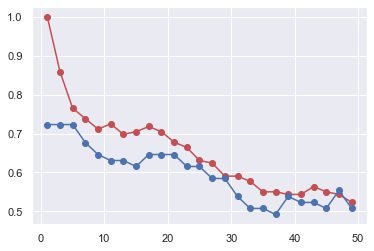

In [64]:
# creating empty list variable 
acc = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values

for i in range(1,50,2):
    neigh = KNeighborsClassifier(n_neighbors=i, metric=distance.cityblock)
    neigh.fit(x_train, y_train)
    train_acc = np.mean(neigh.predict(x_train) == y_train)
    test_acc = np.mean(neigh.predict(x_test) == y_test)
    acc.append([train_acc, test_acc])


# train accuracy plot 
plt.plot(np.arange(1,50,2),[i[0] for i in acc],"ro-")

# test accuracy plot
plt.plot(np.arange(1,50,2),[i[1] for i in acc],"bo-")

> Here we get a K-neighbors value = 5
## Model Building:

In [65]:
manhattan_model = KNeighborsClassifier(n_neighbors=5, metric=distance.cityblock) # Manhattan distance model
manhattan_model.fit(x_train, y_train)

KNeighborsClassifier(metric=<function cityblock at 0x0000022861A438B0>)

In [66]:
print(f'\n\n manhattan distance \n\n')
for i in range(2,40):
  manhattan_model = manhattan_model 
  cv = KFold(n_splits=i, shuffle=True, random_state=0)
  scores = cross_val_score(manhattan_model, x, y, cv=cv)
  print(f'K-Fold number {i} : Accuracy {scores.mean()}')



 manhattan distance 


K-Fold number 2 : Accuracy 0.616822429906542
K-Fold number 3 : Accuracy 0.6774908711528429
K-Fold number 4 : Accuracy 0.6543501048218029
K-Fold number 5 : Accuracy 0.6778516057585826
K-Fold number 6 : Accuracy 0.6727513227513228
K-Fold number 7 : Accuracy 0.6874039938556068
K-Fold number 8 : Accuracy 0.6778846153846154
K-Fold number 9 : Accuracy 0.6777375201288245
K-Fold number 10 : Accuracy 0.6593073593073593
K-Fold number 11 : Accuracy 0.6739234449760766
K-Fold number 12 : Accuracy 0.6691176470588235
K-Fold number 13 : Accuracy 0.6787330316742082
K-Fold number 14 : Accuracy 0.6717261904761905
K-Fold number 15 : Accuracy 0.666984126984127
K-Fold number 16 : Accuracy 0.6778846153846154
K-Fold number 17 : Accuracy 0.677978883861237
K-Fold number 18 : Accuracy 0.6742424242424243
K-Fold number 19 : Accuracy 0.6718500797448166
K-Fold number 20 : Accuracy 0.6740909090909091
K-Fold number 21 : Accuracy 0.6727272727272728
K-Fold number 22 : Accuracy 0.6838383838383838

#### Here the splits for best K-Fold number with best accuracy score is 7.

In [67]:
results = cross_val_score(manhattan_model, x_train, y_train, cv=KFold(n_splits=7))
print(results.mean())

0.6184291898577613


#### Cross validation accuracy = 68%

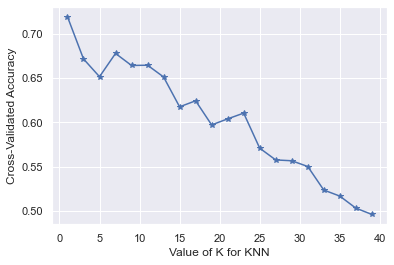

In [68]:
# Visualising k neighbors value:

import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41,2)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric=distance.cityblock)
    scores = cross_val_score(knn, x_train, y_train, cv=KFold(n_splits=7, shuffle=True, random_state=0))
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores, marker = '*')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [69]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(manhattan_model.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(manhattan_model.score(x_test, y_test)))

Training set score: 0.7651
Test set score: 0.7231


In [70]:
# Make predictions
manhattan_predictions = manhattan_model.predict(x_test)
manhattan_predictions

array([7, 1, 2, 6, 5, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 7, 1, 2, 1, 1, 5, 1,
       7, 7, 2, 1, 7, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 7, 2, 6, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 5, 7, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1],
      dtype=int64)

In [71]:
df1 = pd.DataFrame({'actual': y_test, 'manhattan': manhattan_predictions,})
df1.head()

,actual,manhattan
197,7,7
37,1,1
89,2,2
176,6,6
170,5,5


In [72]:
print("Accuracy", accuracy_score(y_test,manhattan_predictions)*100)

Accuracy 72.3076923076923


In [73]:
cm=pd.crosstab(y_test, manhattan_predictions, rownames = ['Actual'], colnames= ['Predictions']) 
cm

Predictions,1,2,5,6,7
Actual,,,,,
1,17,4,0,0,0
2,6,19,1,0,0
3,6,1,0,0,0
5,0,0,2,0,0
6,0,0,0,2,0
7,0,0,0,0,7


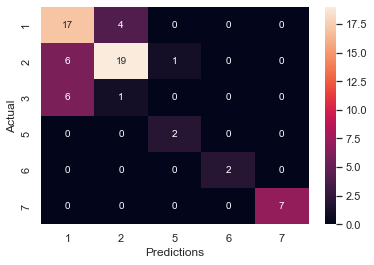

In [74]:
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [75]:
print(classification_report(y_test,manhattan_predictions))

              precision    recall  f1-score   support

           1       0.59      0.81      0.68        21
           2       0.79      0.73      0.76        26
           3       0.00      0.00      0.00         7
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         7

    accuracy                           0.72        65
   macro avg       0.67      0.76      0.71        65
weighted avg       0.67      0.72      0.69        65



In [76]:
# RMSE for train data
train_preds_grid = grid.predict(x_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = np.sqrt(train_mse)

# RMSE for test data
test_preds_grid = grid.predict(x_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = np.sqrt(test_mse)
print(f'\n train rmse = {train_rmse} \n\n test rmse = {test_rmse} \n\n')




 train rmse = 0.0 

 test rmse = 0.8227533512074423 




In [77]:
y_test

197    7
37     1
89     2
176    6
170    5
      ..
157    3
8      1
40     1
129    2
13     1
Name: Type, Length: 65, dtype: int64

In [78]:
manhattan_predictions

array([7, 1, 2, 6, 5, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 7, 1, 2, 1, 1, 5, 1,
       7, 7, 2, 1, 7, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 7, 2, 6, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 5, 7, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1],
      dtype=int64)

In [79]:
y_pred_prob = manhattan_model.predict_proba(x_test)
y_pred_prob[10]

array([0.6, 0.4, 0. , 0. , 0. , 0. ])

In [80]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob , columns=['1', '2','3','5','6','7'])

y_pred_prob_df

,1,2,3,5,6,7
0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.2,0.8,0.0,0.0,0.0,0.0
3,0.2,0.0,0.0,0.0,0.8,0.0
4,0.0,0.4,0.0,0.6,0.0,0.0
...,...,...,...,...,...,...
60,0.8,0.0,0.2,0.0,0.0,0.0
61,0.4,0.6,0.0,0.0,0.0,0.0
62,1.0,0.0,0.0,0.0,0.0,0.0
63,0.0,0.8,0.2,0.0,0.0,0.0


## ROC AUC Curve:



 ROC AUC score: 0.8436239686239686 




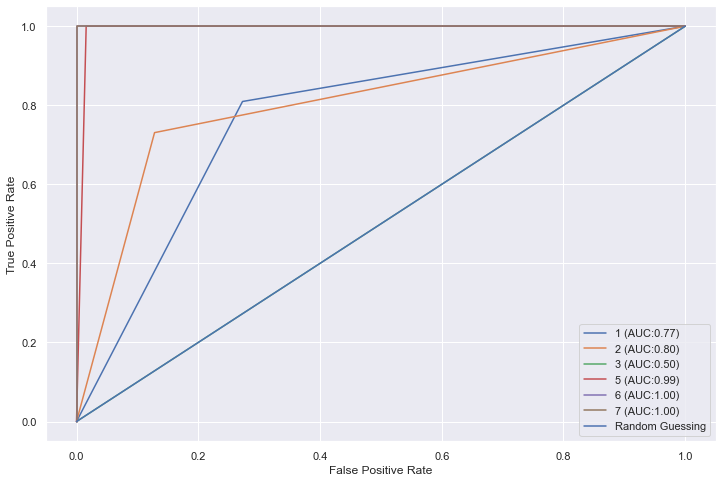

In [81]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ["1","2","3","5","6","7"]

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

print(f'\n\n ROC AUC score: {multiclass_roc_auc_score(y_test, manhattan_predictions)} \n\n')

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

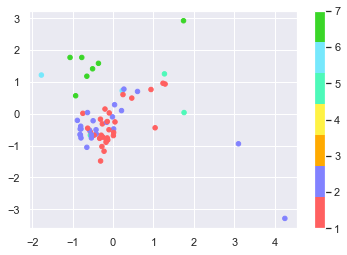

In [82]:
from matplotlib.colors import ListedColormap

# custome color maps
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c=manhattan_predictions, s=20, cmap=cm_dark)
f.colorbar(points)
plt.show()

## Using Over Sampling for balancing the data:

* We will use RandomOverSampler (ROS) for sampling the the data to balance our data

In [83]:
import imblearn

In [84]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 0)

## Fitting the data using ROS:

In [87]:
x_resample, y_resample = ros.fit_resample(x, y)
y_df = pd.DataFrame(y_resample)

In [88]:
y_df.value_counts()

Type
1       76
2       76
3       76
5       76
6       76
7       76
dtype: int64

* *We could see the data is resampled now and all the type values are 76 now. Previously only Type 1 was 76. We will split the resampled data into training and test data and build a KNN mode*

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(x_resample, y_resample, test_size = .2, random_state = 0, stratify = y_resample)

### Using GridSearch for Algorithm Tuning after resampling

In [90]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=parameters,n_jobs=-1,verbose=1, scoring="accuracy")
grid.fit(X_train, Y_train)


Fitting 5 folds for each of 320 candidates, totalling 1600 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [91]:
print(grid.best_score_ ,'\n',"\n" , grid.best_params_)

0.8872907153729072 
 
 {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}


In [92]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(grid.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(grid.score(X_test, Y_test)))

Training set score: 1.0000
Test set score: 0.9022


> By fitting the model with GridsearchCv we came up with the overfitting issue, to overcome this issue now we plot the training and testing graph to give us best k-Neighbor value.


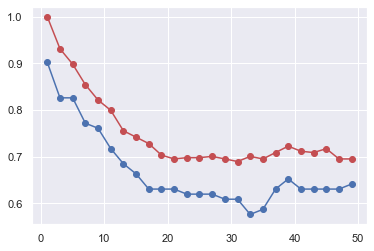

In [93]:
# creating empty list variable 
acc = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values

for i in range(1,50,2):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    train_acc = np.mean(neigh.predict(X_train) == Y_train)
    test_acc = np.mean(neigh.predict(X_test) == Y_test)
    acc.append([train_acc, test_acc])


# train accuracy plot 
plt.plot(np.arange(1,50,2),[i[0] for i in acc],"ro-")

# test accuracy plot
plt.plot(np.arange(1,50,2),[i[1] for i in acc],"bo-")

> Here we get a K-neighbors value = 5
## Model Building:

In [94]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [95]:
print(f'\n\n manhattan distance \n\n')
for i in range(2,40):
  Model = model 
  cv = KFold(n_splits=i, shuffle=True, random_state=0)
  scores = cross_val_score(model, x_resample, y_resample, cv=cv)
  print(f'K-Fold number {i} : Accuracy {scores.mean()}')



 manhattan distance 


K-Fold number 2 : Accuracy 0.7302631578947368
K-Fold number 3 : Accuracy 0.793859649122807
K-Fold number 4 : Accuracy 0.8157894736842105
K-Fold number 5 : Accuracy 0.8223363592928811
K-Fold number 6 : Accuracy 0.8245614035087719
K-Fold number 7 : Accuracy 0.8487845487845487
K-Fold number 8 : Accuracy 0.8464912280701755
K-Fold number 9 : Accuracy 0.8575599128540304
K-Fold number 10 : Accuracy 0.8531884057971014
K-Fold number 11 : Accuracy 0.8553479041283919
K-Fold number 12 : Accuracy 0.8574561403508772
K-Fold number 13 : Accuracy 0.8511599511599511
K-Fold number 14 : Accuracy 0.853219696969697
K-Fold number 15 : Accuracy 0.853046594982079
K-Fold number 16 : Accuracy 0.8621459359605912
K-Fold number 17 : Accuracy 0.8576336517512989
K-Fold number 18 : Accuracy 0.8574358974358975
K-Fold number 19 : Accuracy 0.8552631578947368
K-Fold number 20 : Accuracy 0.8553359683794467
K-Fold number 21 : Accuracy 0.8509585652442796
K-Fold number 22 : Accuracy 0.853030303030303


#### Here the splits for best K-Fold number with best accuracy score is 16.

In [96]:
results = cross_val_score(model, X_train, Y_train, cv=KFold(n_splits=16))
print(results.mean())

0.8159584980237155


### Visualizing the accuracy with different k values on sampled data

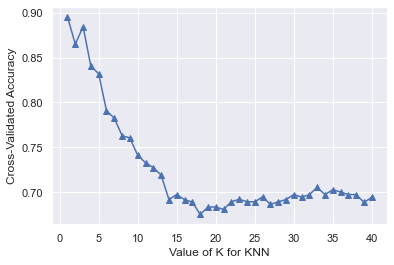

In [97]:
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=KFold(n_splits=16, shuffle=True, random_state=0))
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores, marker = "^")
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [98]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, Y_test)))

Training set score: 0.8984
Test set score: 0.8261


In [99]:
# Make predictions
model_preds = model.predict(X_test)
model_preds

array([5, 6, 1, 1, 2, 6, 2, 2, 3, 6, 3, 7, 6, 3, 3, 2, 7, 1, 3, 1, 3, 7,
       2, 6, 6, 5, 6, 7, 5, 3, 5, 1, 6, 7, 7, 3, 5, 5, 5, 5, 2, 1, 2, 6,
       6, 6, 6, 3, 3, 7, 6, 2, 3, 3, 1, 7, 3, 2, 3, 2, 6, 2, 5, 7, 3, 5,
       3, 5, 3, 6, 1, 5, 2, 3, 5, 1, 5, 7, 6, 2, 1, 3, 7, 7, 7, 3, 5, 1,
       5, 7, 6, 5], dtype=int64)

In [100]:
print("Accuracy", accuracy_score(Y_test,model_preds)*100)

Accuracy 82.6086956521739


In [101]:
cm=pd.crosstab(Y_test, model_preds, rownames = ['Actual'], colnames= ['Predictions']) 
cm

Predictions,1,2,3,5,6,7
Actual,,,,,,
1,8,5,3,0,0,0
2,3,8,2,2,0,0
3,0,0,15,0,0,0
5,0,0,0,15,0,0
6,0,0,0,0,16,0
7,0,0,0,0,1,14


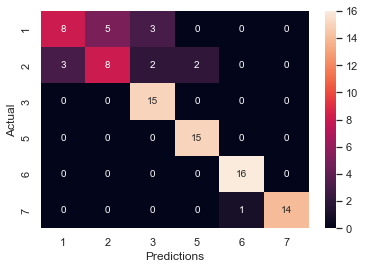

In [102]:
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [103]:
print(classification_report(y_test,manhattan_predictions))

              precision    recall  f1-score   support

           1       0.59      0.81      0.68        21
           2       0.79      0.73      0.76        26
           3       0.00      0.00      0.00         7
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         7

    accuracy                           0.72        65
   macro avg       0.67      0.76      0.71        65
weighted avg       0.67      0.72      0.69        65



In [104]:
# RMSE for train data
train_preds_grid = grid.predict(X_train)
train_mse = mean_squared_error(Y_train, train_preds_grid)
train_rmse = np.sqrt(train_mse)

# RMSE for test data
test_preds_grid = grid.predict(X_test)
test_mse = mean_squared_error(Y_test, test_preds_grid)
test_rmse = np.sqrt(test_mse)
print(f'\n train rmse = {train_rmse} \n\n test rmse = {test_rmse} \n\n')




 train rmse = 0.0 

 test rmse = 0.4662524041201569 




In [105]:
y_pred_prob = model.predict_proba(X_test)
y_pred_prob[10]

array([0., 0., 1., 0., 0., 0.])

In [106]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob , columns=['1', '2','3','5','6','7'])

y_pred_prob_df

,1,2,3,5,6,7
0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.4,0.2,0.4,0.0,0.0,0.0
4,0.0,0.6,0.0,0.4,0.0,0.0
...,...,...,...,...,...,...
87,0.6,0.2,0.2,0.0,0.0,0.0
88,0.0,0.0,0.0,1.0,0.0,0.0
89,0.0,0.0,0.0,0.0,0.0,1.0
90,0.0,0.2,0.0,0.0,0.8,0.0


## ROC AUC Curve:



 ROC AUC score: 0.8965159109895952 




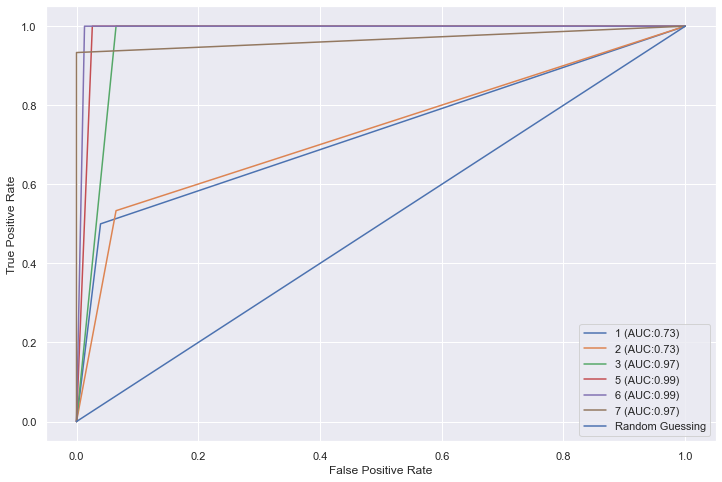

In [107]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ["1","2","3","5","6","7"]

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

print(f'\n\n ROC AUC score: {multiclass_roc_auc_score(Y_test, model_preds)} \n\n')

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

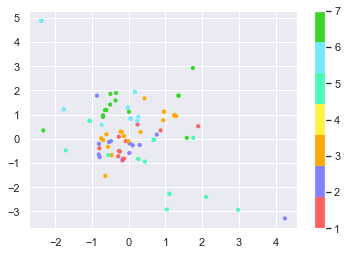

In [108]:
from matplotlib.colors import ListedColormap

# custome color maps
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=model_preds, s=10, cmap=cm_dark)
f.colorbar(points)
plt.show()

## Prediction with both model :

In [109]:
df1 = pd.DataFrame({'Actual': y_test, 'Manhattan': manhattan_predictions, 'Euclid': euclid_predictions })
df1.head()

,Actual,Manhattan,Euclid
197,7,7,7
37,1,1,1
89,2,2,2
176,6,6,1
170,5,5,5


In [110]:
df2 = pd.DataFrame({'actual': Y_test, 'Prediction': model_preds})
df2.head() 

,actual,Prediction
302,5,5
355,6,6
16,1,1
83,2,1
106,2,2


## Drawbacks of KNN:

> The real drawback of kNN is its capacity to adapt to highly complex relationships between independent and dependent variables. kNN is less likely to perform well on advanced tasks like computer vision and natural language processing.